In [10]:
import os
import ggcas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.table import QTable
%matplotlib inline
mc = ggcas.analyzers.mcluster
dr3 = ggcas.GaiaQuery()
def load_simulation(path):
    df = QTable.read(path, format='ascii')
    return df

Initialized with Gaia table: 'gaiadr3.gaia_source'


In [19]:
simfile = "C:\\Users\\pietr\\Desktop\\ngc6121_test_1M_sim.csv"
sim_n6121 = load_simulation(simfile)

In [24]:
sim_n6121.pprint()
v_tot = np.sqrt(sim_n6121['vx_[km/s]']**2 + sim_n6121['vy_[km/s]']**2 + sim_n6121['vz_[km/s]']**2)

Mass_[Msun]        x_[pc]       ...      vy_[km/s]           vz_[km/s]     
----------- ------------------- ... ------------------- -------------------
        1.0  0.0409743737032272 ...   18.65892469277345  -3.207355503853628
        1.0 -0.4213409059060659 ...  -16.04120185345418  -47.35865827766505
        1.0 -1.4046725836918441 ...  -4.768104339731033  -11.04559485004959
        1.0   0.167804518109419 ...  25.672387175871137  24.039618028245748
        1.0   2.045339021712494 ...  25.697122724916373 -22.601263346039236
        1.0  0.1545560158907177 ...   7.810655365352154  -8.453572120101382
        1.0  0.0364136002513404 ...  25.109796795806286  19.994008119329138
        1.0  0.3058420332457075 ...  29.426724427371433 -51.868850173070896
        1.0 -0.4481132833186651 ...  -41.70109777066756   5.146834926625154
        1.0 -0.0185869726726401 ... -26.834192001760364    28.6078271789096
        ...                 ... ...                 ...                 ...
        1.0 

RParsingError: Parsing status not OK - PARSING_STATUS.PARSE_NULL

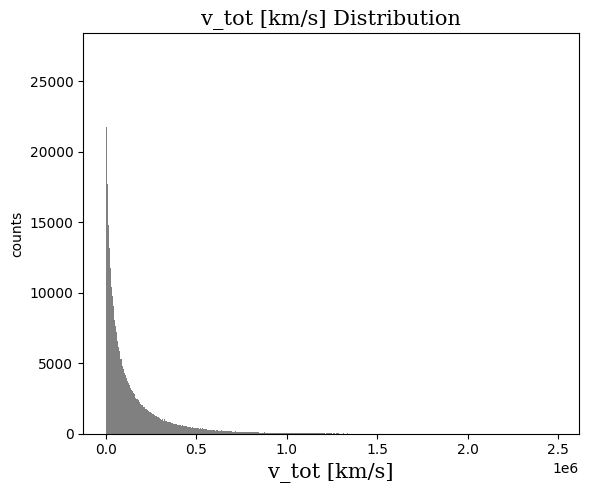

In [45]:
ggcas.plots.histogram(v_tot**3, kde=True, kde_kind='exponential', xlabel='v_tot [km/s]', xlim=(-0.02e6, 0.7e6))

A*(B*(1 - exp(-s*x))/(s*x) + C*(1 - exp(-s*x))/(s**2*x**2) + 1)